In [33]:
import pandas as pd
import numpy as np
import os
import json
import altair as alt
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:

JSON_FILE = "../results/BDNF/Recombinants/BDNF_codons_RDP_recombinationFree.fas.ABSREL.json"
TREE_FILE = ""
pvalueThreshold = 0.05

In [36]:
def getABSRELData(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["branch attributes"]["0"]
#end method

def getABSRELHeaders(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["headers"]
#end method

"""
 "test results":{
   "P-value threshold":0.05,
   "positive test results":38,
   "tested":513
  }

"""

def getABSREL_TestResults(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["test results"]
#end method


def getABSREL_Input(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["input"]
#end method

In [37]:
data = getABSRELData(JSON_FILE)
df = pd.DataFrame(data)
df = df.T
df.to_csv("../tables/BDNF/BDNF_aBSREL_Table.csv")
df

,Baseline MG94xREV,Baseline MG94xREV omega ratio,Corrected P-value,Full adaptive model,Full adaptive model (non-synonymous subs/site),Full adaptive model (synonymous subs/site),LRT,Nucleotide GTR,Rate Distributions,Rate classes,Uncorrected P-value,original name
NM_001009828_1_Felis_catus_brain_derived_neurotrop,0.006804,1.64702,1,0.006784,0.005423,0.001362,0.107682,0.006802,"[[1.429256422955653, 1]]",1,0.432834,NM_001009828_1_Felis_catus_brain_derived_neuro...
NM_001012441_1_Pan_troglodytes_brain_derived_neuro,0.00136,0,1,0.001346,0.0,0.001346,0,0.00136,"[[0, 1]]",1,1,NM_001012441_1_Pan_troglodytes_brain_derived_n...
NM_001048142_1_Mus_musculus_brain_derived_neurotro,0,1,1,0,0.0,0.0,0,0,"[[1, 1]]",1,1,NM_001048142_1_Mus_musculus_brain_derived_neur...
NM_001081787_1_Equus_caballus_brain_derived_neurot,0,1,1,0,0.0,0.0,0,0,"[[1, 1]]",1,1,NM_001081787_1_Equus_caballus_brain_derived_ne...
NM_001270630_1_Rattus_norvegicus_brain_derived_neu,0,1,1,0,0.0,0.0,0,0,"[[1, 1]]",1,1,NM_001270630_1_Rattus_norvegicus_brain_derived...
...,...,...,...,...,...,...,...,...,...,...,...,...
XM_039866065_1_PREDICTED_Pteropus_giganteus_brain_,0.001347,10000000000,1,0.001346,0.001346,0.0,0.613768,0.001351,"[[10000000000, 1]]",1,0.307395,XM_039866065_1_PREDICTED_Pteropus_giganteus_br...
XM_040258919_1_PREDICTED_Oryx_dammah_brain_derived,0.00411,0.197463,1,0.004126,0.001336,0.00279,0,0.004005,"[[0.1719435818299737, 1]]",1,1,XM_040258919_1_PREDICTED_Oryx_dammah_brain_der...
XM_040284582_1_PREDICTED_Ictidomys_tridecemlineatu,0.001339,0,1,0.00135,0.0,0.00135,0,0.001369,"[[0, 1]]",1,1,XM_040284582_1_PREDICTED_Ictidomys_tridecemlin...
XM_040980297_1_PREDICTED_Ochotona_curzoniae_brain_,0.004316,0.189382,1,0.004225,0.001354,0.00287,0,0.004183,"[[0.1693094960200709, 1]]",1,1,XM_040980297_1_PREDICTED_Ochotona_curzoniae_br...


### Selected Branches

In [38]:
df_results = df[df["Corrected P-value"] < 0.05]
df_results.reset_index(inplace=True)
df_results.index += 1
df_results.drop('index', axis=1, inplace=True)
df_results

#print(df_results.to_markdown())

,Baseline MG94xREV,Baseline MG94xREV omega ratio,Corrected P-value,Full adaptive model,Full adaptive model (non-synonymous subs/site),Full adaptive model (synonymous subs/site),LRT,Nucleotide GTR,Rate Distributions,Rate classes,Uncorrected P-value,original name
1,0.017294,0.397747,0.000167,1.469983,1.464131,0.005852,26.136017,0.016829,"[[0.148285201122775, 0.9901379757552453], [909...",2,0.000001,XM_028501134_1_PREDICTED_Physeter_catodon_brai...


In [39]:
df_results = df[df["Corrected P-value"] < 0.05]
df_results['Name'] = df_results.index
df_results.reset_index(inplace=True)
df_results.index += 1
df_results

,index,Baseline MG94xREV,Baseline MG94xREV omega ratio,Corrected P-value,Full adaptive model,Full adaptive model (non-synonymous subs/site),Full adaptive model (synonymous subs/site),LRT,Nucleotide GTR,Rate Distributions,Rate classes,Uncorrected P-value,original name,Name
1,XM_028501134_1_PREDICTED_Physeter_catodon_brai...,0.017294,0.397747,0.000167,1.469983,1.464131,0.005852,26.136017,0.016829,"[[0.148285201122775, 0.9901379757552453], [909...",2,0.000001,XM_028501134_1_PREDICTED_Physeter_catodon_brai...,XM_028501134_1_PREDICTED_Physeter_catodon_brai...


## Visualize

In [40]:
x = getABSREL_Input(JSON_FILE)
TREE = x["trees"]["0"]
#TREE 

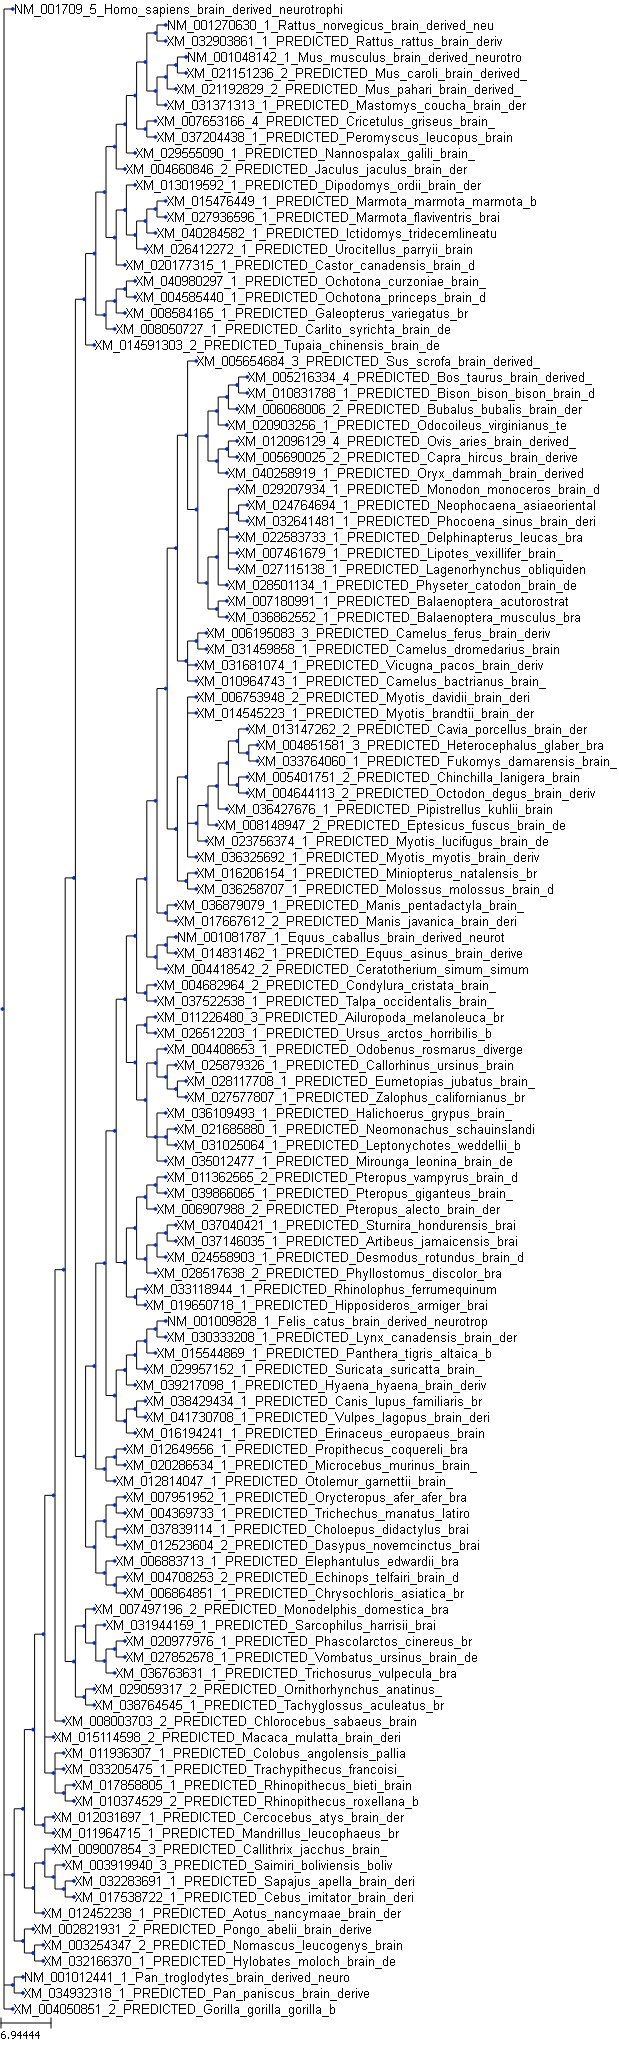

In [41]:
#t = Tree( "((a,b),c);" )
t = Tree(TREE+";", format=1)
#t.render("mytree.png")
t.render("%%inline")  

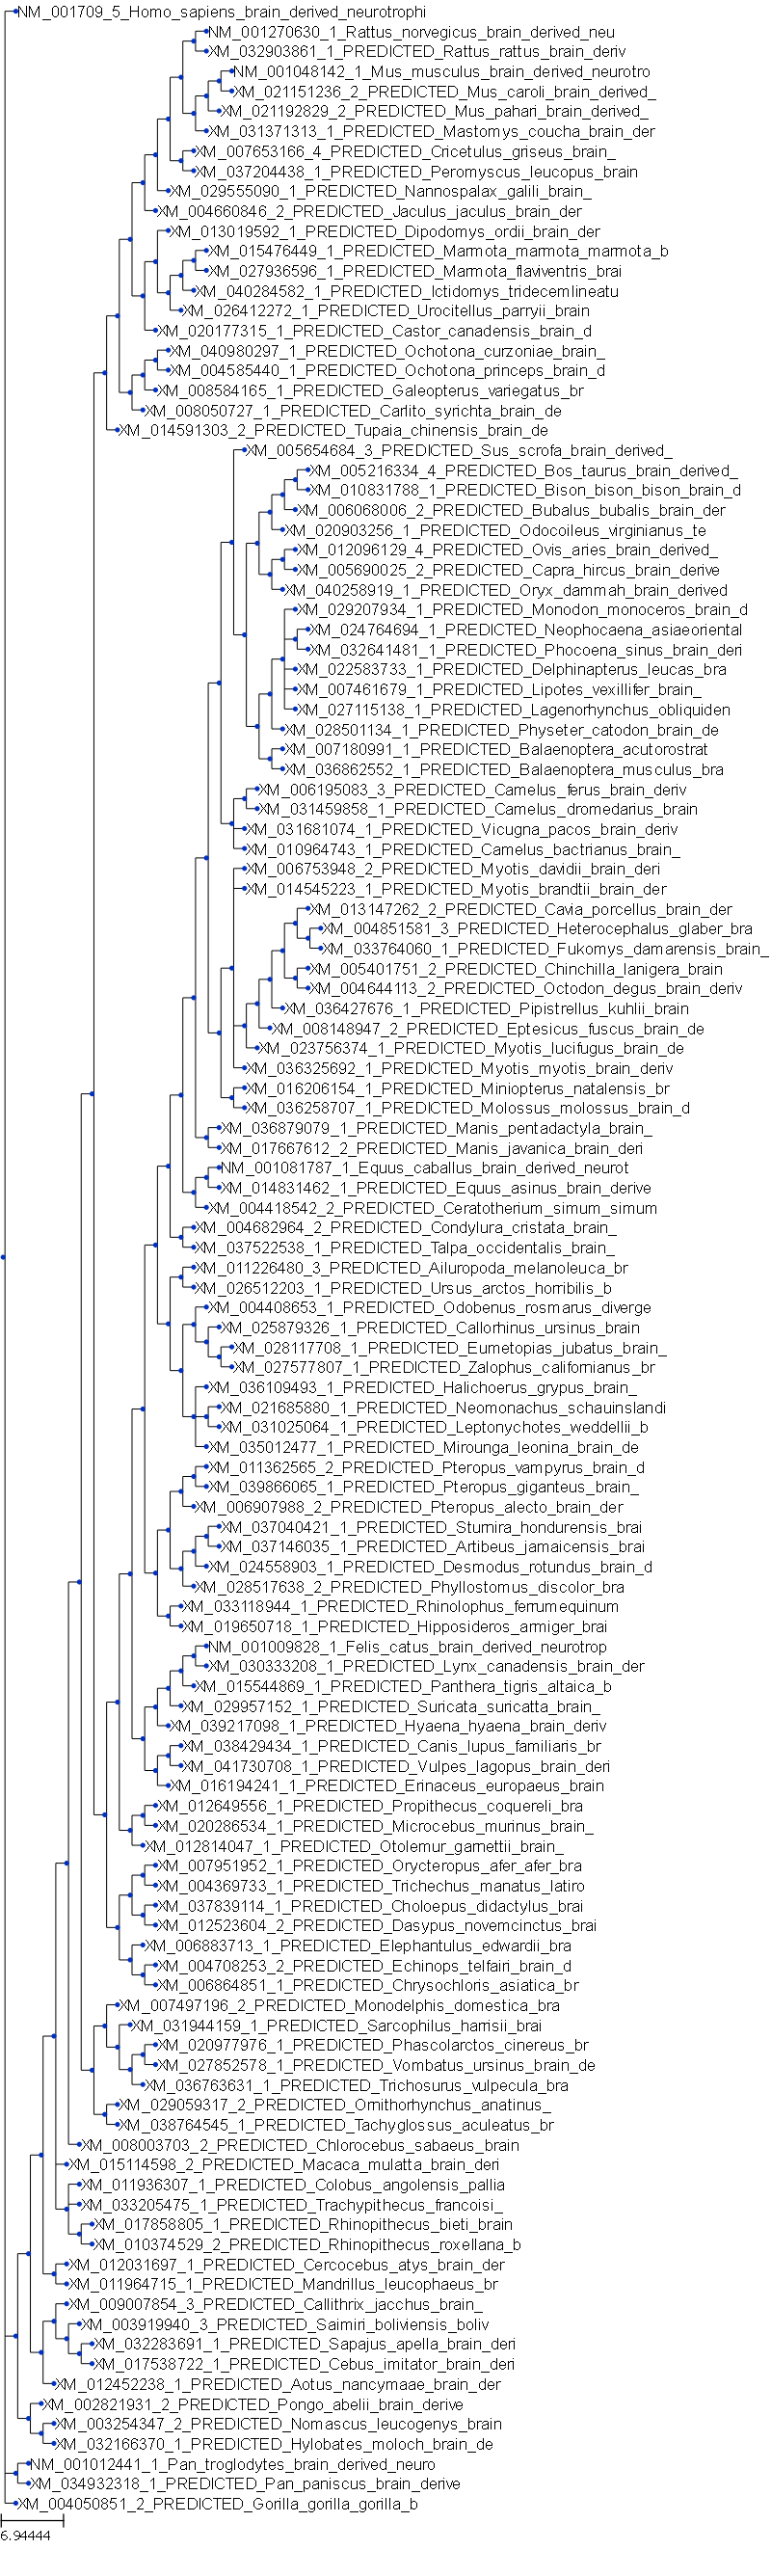

In [16]:

t = Tree(TREE+";", format=1)
ts = TreeStyle()
#ts.mode = "c" # use circular mode 

t.render("%%inline", tree_style=ts, w=800)  

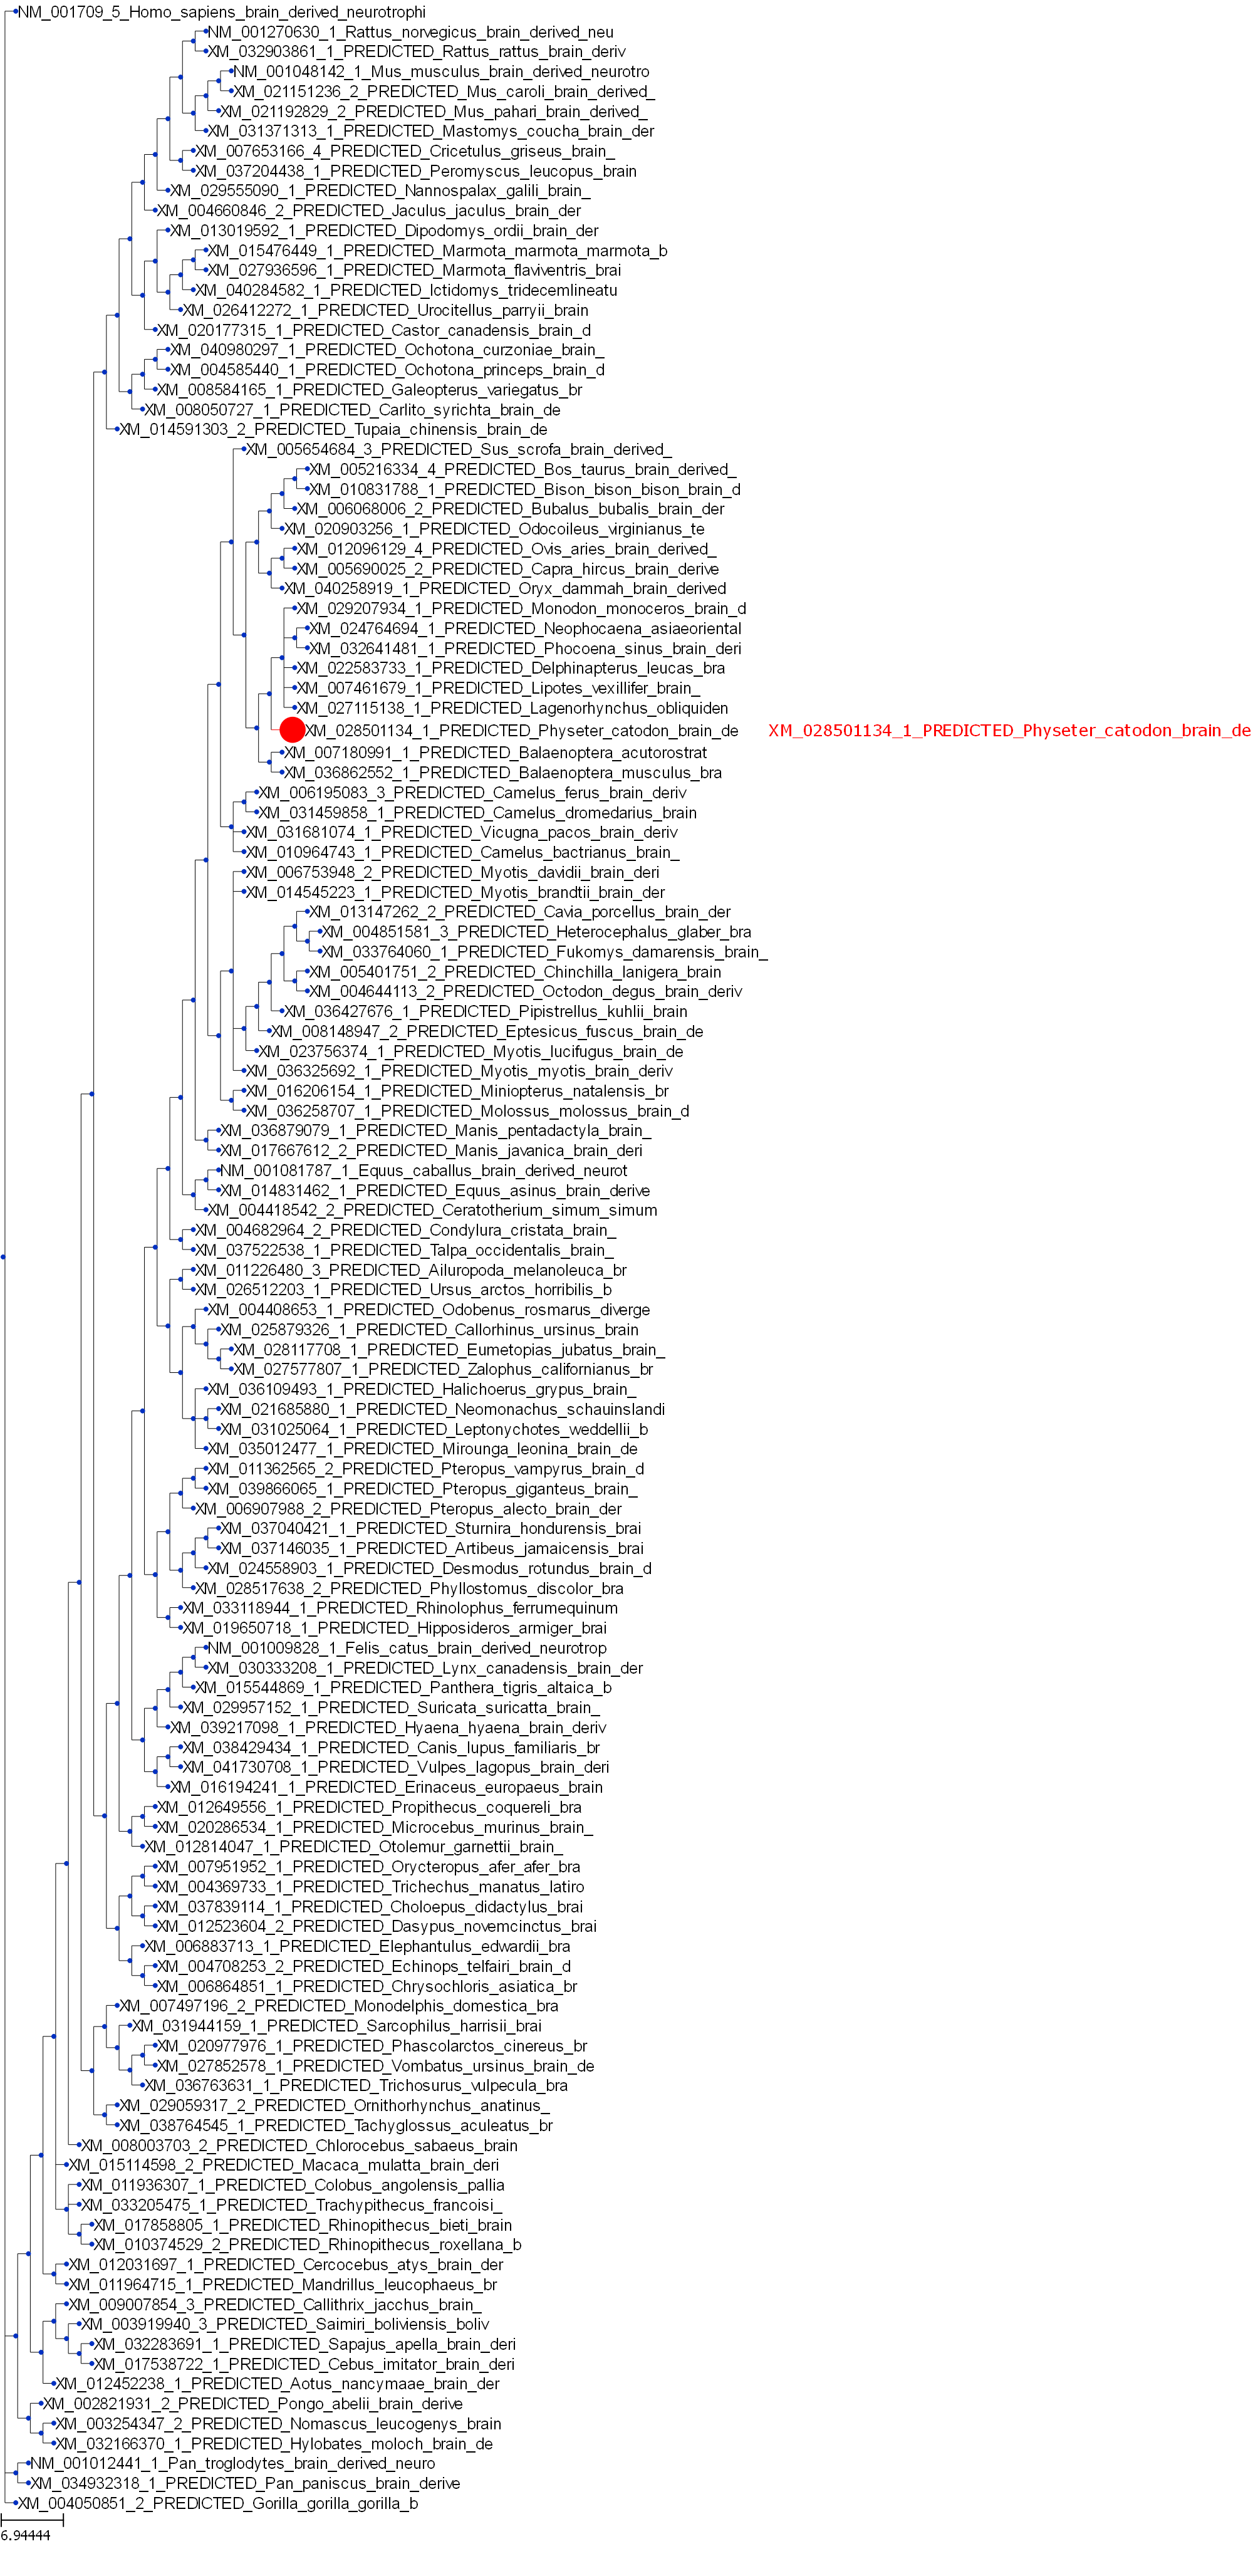

In [42]:
from ete3 import TreeStyle
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

t = Tree(TREE+";", format=1)
ts = TreeStyle()
#ts.show_leaf_name = True
ts.mode = "c" # use circular mode 

for l in t.iter_leaves():
    #print([str(l).replace("--", "").replace("\n", "")])
    
    if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
        
    # create a new label with a color attribute
    N = AttrFace("name", fgcolor="Red")
    # label margins
    N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 20
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    
    #l.set_style(ns)
    l.img_style = ns
    
#end for
t.render("%%inline", w=2000)  

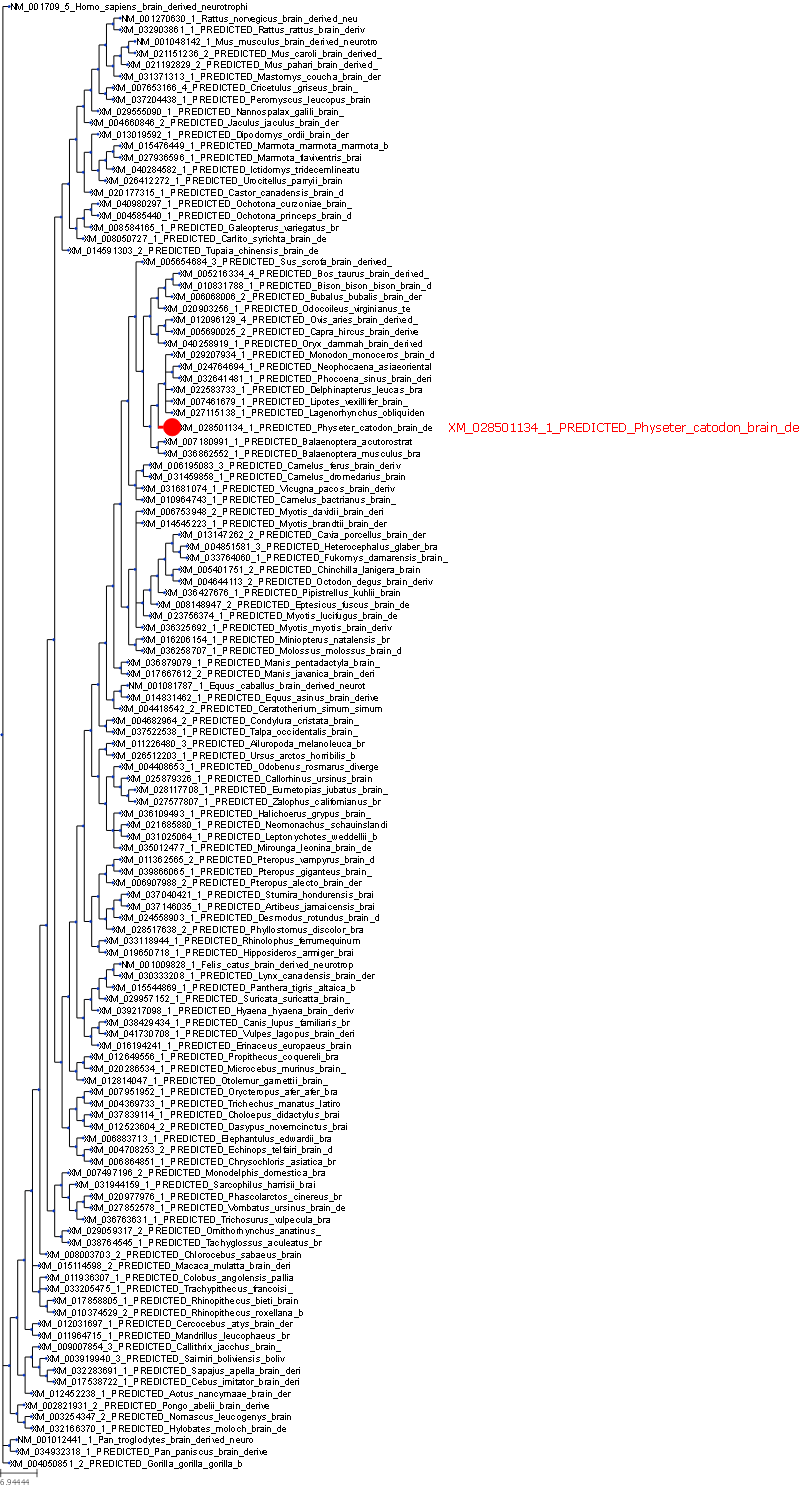

In [23]:
from ete3 import TreeStyle
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

t = Tree(TREE+";", format=1)
ts = TreeStyle()
#ts.show_leaf_name = True
ts.mode = "c" # use circular mode 
ts.show_branch_length = True
ts.show_scale = True

#for l in t.iter_leaves():
for l in t.traverse("postorder"):
    #print([str(l).replace("--", "").replace("\n", "")])
    
    #if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
    if l.name not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
        
    # create a new label with a color attribute
    N = AttrFace("name", fgcolor="Red", fsize=12)
    # label margin
    N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 24
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    ns["vt_line_width"] = 4
    ns["hz_line_width"] = 4
    #style["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
    #style["hz_line_type"] = 0
    
    #l.set_style(ns)
    l.img_style = ns
#end for

t.render("%%inline", w=800, dpi=300)  

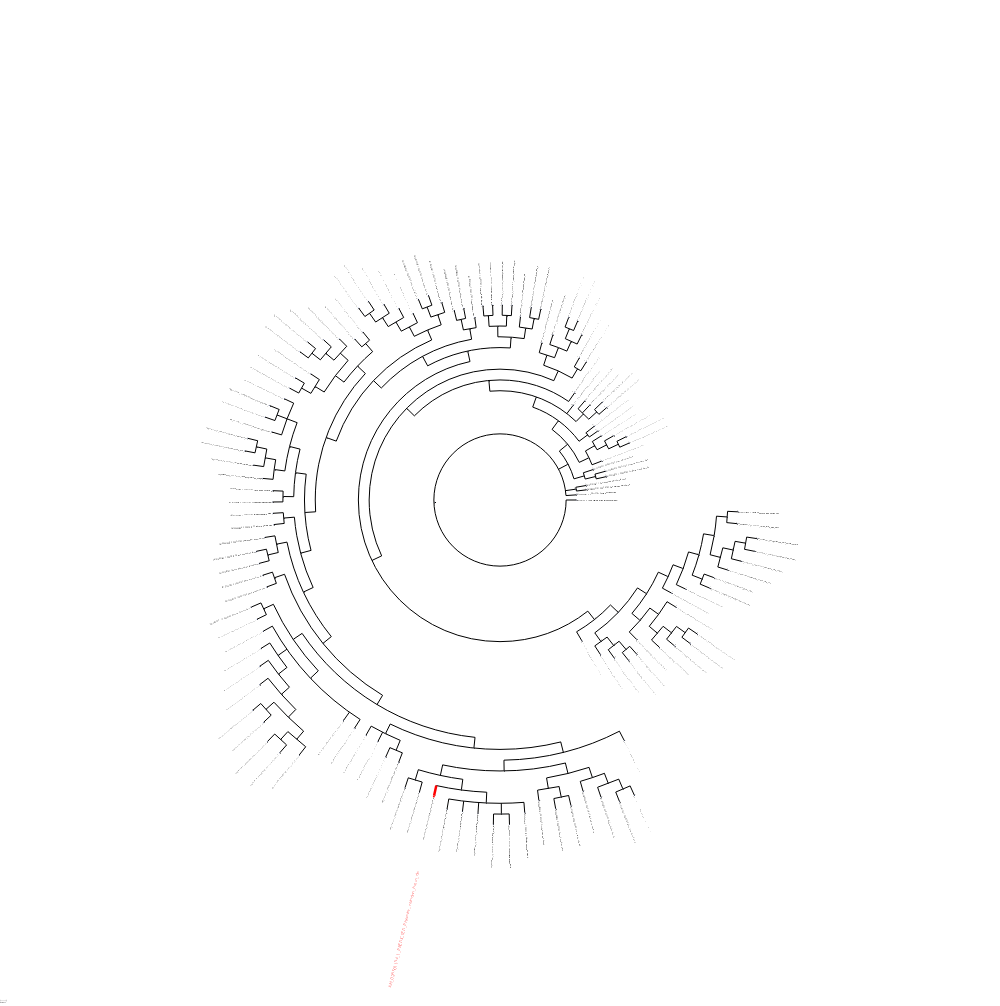

In [43]:
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace

t = Tree(TREE+";", format=1)
ts = TreeStyle()
#ts.show_leaf_name = True
ts.mode = "c" # use circular mode 
ts.show_branch_length = True
ts.show_scale = True

#for l in t.iter_leaves():
for l in t.traverse("postorder"):
    #print([str(l).replace("--", "").replace("\n", "")])
    
    #if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
    if l.name not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
        
    # create a new label with a color attribute
    N = AttrFace("name", fgcolor="Red", fsize=24)
    # label margin
    N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 15
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    ns["vt_line_width"] = 20
    ns["hz_line_width"] = 20
    #style["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
    #style["hz_line_type"] = 0
    
    #l.set_style(ns)
    l.img_style = ns
#end for

t.render("%%inline", tree_style=ts, w=1000)  

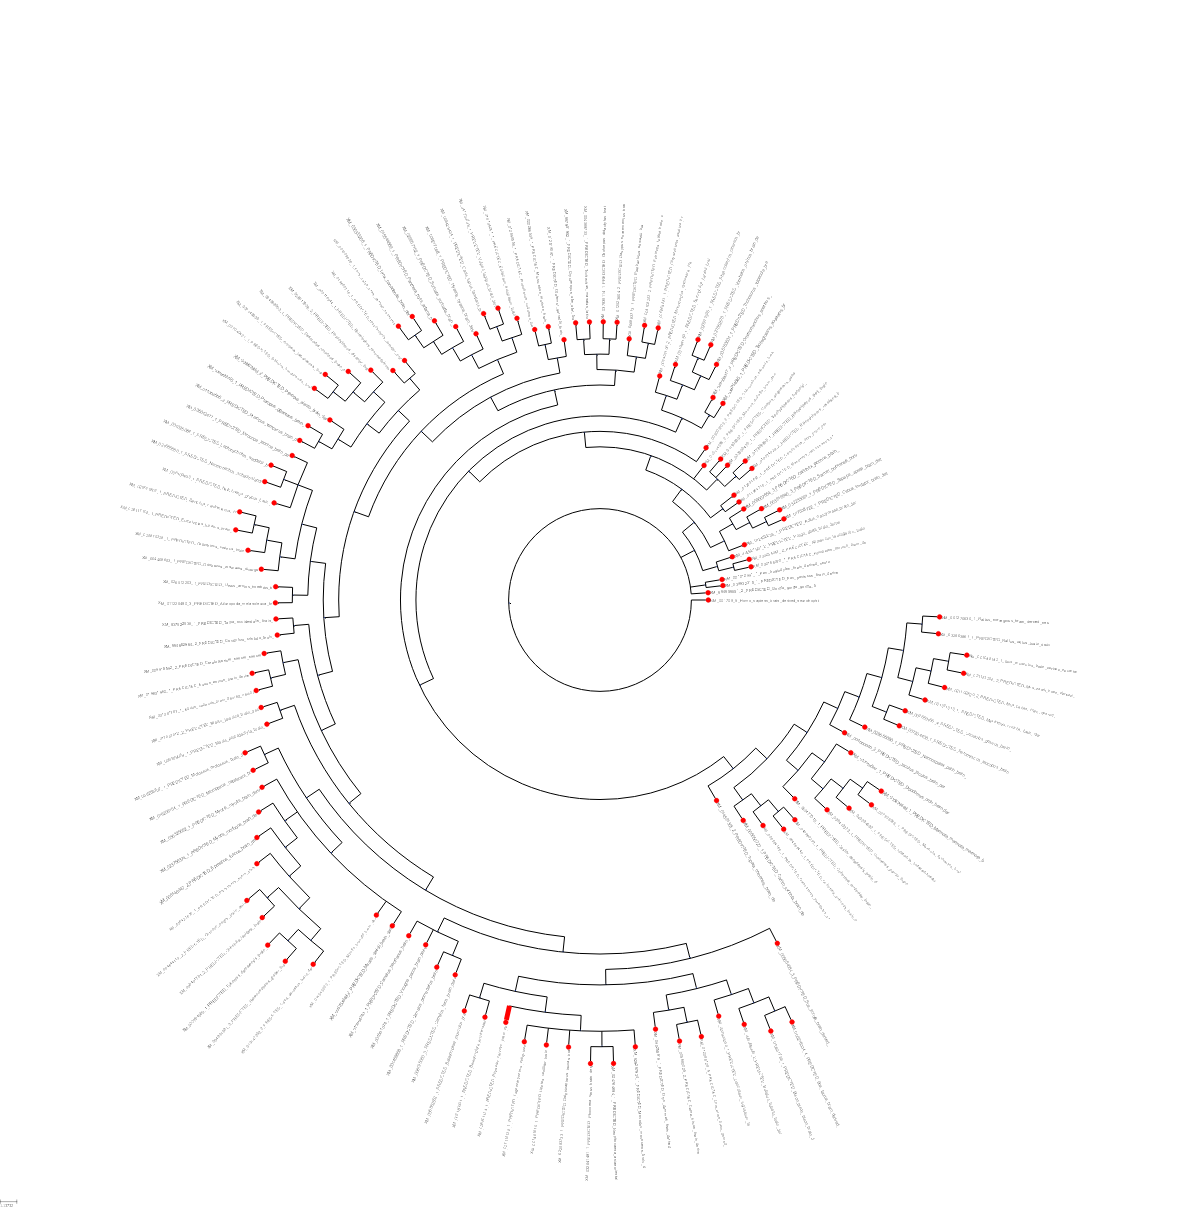

In [12]:
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace, faces

t = Tree(TREE+";", format=1)
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c" # use circular mode 
#ts.show_branch_length = True
ts.show_scale = True
#ts.force_topology = True
#t.populate(50, random_branches=True)
#ts.scale =  120

for n in t.traverse():
    if not n.is_leaf(): continue 
    nstyle = NodeStyle()
    nstyle["fgcolor"] = "red"
    nstyle["size"] = 15
    n.set_style(nstyle)

#for l in t.iter_leaves():
for l in t.traverse("postorder"):
    #name_face = AttrFace("name")
    #faces.add_face_to_node(name_face, node, column=0, position="branch-right")
    #print([str(l).replace("--", "").replace("\n", "")])
    #if str(l).replace("--", "").replace("\n", "") not in df_results["Name"].to_list(): 
    
    #if node.is_leaf():
    #    print("a")
    
    if l.name not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
    
    
        
    # create a new label with a color attribute
    #N = AttrFace("name", fgcolor="Red", fsize=24)
    # label margin
    #N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    #l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 15
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    ns["vt_line_width"] = 15
    ns["hz_line_width"] = 15
    #style["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
    #style["hz_line_type"] = 0
    
    l.set_style(ns)
    l.img_style = ns
#end for

t.render("%%inline", tree_style=ts, w=1200)  

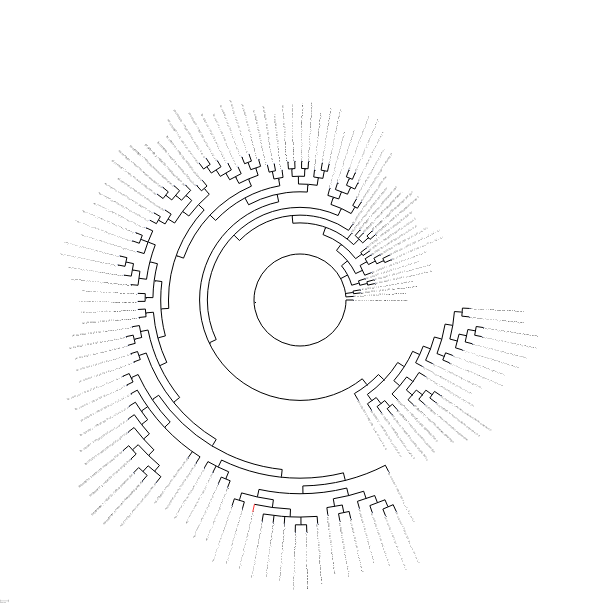

In [47]:
t = Tree(TREE+";", format=1)
ts = TreeStyle()

#ts.show_leaf_name = True
ts.mode = "c" # use circular mode 
#ts.show_scale = True

#nameFace = faces.AttrFace("name", fsize=20, fgcolor="#009000")

#for n in t.traverse():
#    if n.is_leaf():
#        faces.add_face_to_node(nameFace, n, column=0)
    
    
for l in t.traverse("postorder"):    
    if l.name not in df_results["Name"].to_list(): 
        #print("#Skipping:", l)
        continue
    #print("# Processing:", l)
       
        
    # create a new label with a color attribute
    #N = AttrFace("name", fgcolor="Red", fsize=24)
    # label margin
    #N.margin_top = N.margin_bottom = N.margin_left = 0.0
    # labels aligned to the same level
    #l.add_face(N, 0, position='aligned')
    
    # optionally colorize nodes too
    ns = NodeStyle()
    ns["fgcolor"] = "Red"
    ns["size"] = 5
    ns["vt_line_color"] = "Red"
    ns["hz_line_color"] = "Red"
    ns["vt_line_width"] = 5
    ns["hz_line_width"] = 5
    
    l.set_style(ns)
    l.img_style = ns
#end for

t.render("%%inline", tree_style=ts, w=600)  

#t.render("BDNF_Recombinants_aBSREL.png", tree_style=ts, w=600)  























## Figure legend.

In [49]:
## Summary
#a = len(df["omega"])
#b = len(negative_sites["omega"])

x = getABSREL_TestResults(JSON_FILE)
#print(x)

a = x["tested"]
b = x['positive test results']

print("aBSREL analysis of your gene of interest found " + str(b) + " of " + str(a) + " branches to be statistically significant (p-value <= " + str(pvalueThreshold) + ") for episodic diversifying selection." )


aBSREL analysis of your gene of interest found 1 of 239 branches to be statistically significant (p-value <= 0.05) for episodic diversifying selection.


In [1]:
df_results

NameError: name 'df_results' is not defined